In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load pre-processed data
FecalMG_BA = pd.read_csv("FecalMG_BA.csv", index_col=0, delimiter=",")
FecalMG_BA = FecalMG_BA.T
FecalMG_BA.index.name = 'patient_id'

# Define a list of invalid names: no information or virus are invalid
invalid_names = ['f__; g__; s__','g__; s__','Afipia','Abiotrophia','Acidovorax','Acinetobacter','Aeromicrobium','Aquabacterium','Arthrobacter','Asticcacaulis','Aurantimonas','Azoarcus','Azospira','Bacillus','Beijerinckia','Beutenbergia','Bosea','Bradyrhizobium','Brevibacillus','Brevundimonas','Brochothrix','Burkholderia','Caulobacter','Chryseobacterium','Corynebacterium','Craurococcus','Curtobacterium','Deinococcus','Devosia','Dietzia','Dyadobacter','Enhydrobacter','Enterobacter','Escherichia','Facklamia','Flavobacterium','Geodermatophilus','Hoeflea','Hydrotalea','Janibacter','Kingella','Kocuria','Leptothrix','Limnobacter','Massilia','Mesorhizobium','Methylobacterium','Methylophilus','Methyloversatilis','Microbacterium','Micrococcus','Microlunatus','Nevskia','Niastella','Novosphingobium','Ochrobactrum','Olivibacter','Oxalobacter','Paenibacillus','Paracoccus','Patulibacter','Pedobacter','Pedomicrobium','Pelomonas','Phyllobacterium','Polaromonas','Propionibacterium','Pseudomonas','Pseudoxanthomonas','Psychrobacter','Ralstonia','Rhizobium','Rhodococcus','Roseomonas','Schlegelella','Sphingobium','Sphingomonas','Sphingopyxis','Stenotrophomonas','Streptococcus','Sulfuritalea','Tsukamurella','Undibacterium','Variovorax','Wautersiella','Xanthomonas']

for col in FecalMG_BA.columns:
    if any(invalid_name in col for invalid_name in invalid_names):
        FecalMG_BA.drop(col, axis=1, inplace=True)

FecalMG_BA.index = FecalMG_BA.index.astype(str)
FecalMG_BA

Patient_id,Pisciglobus,Pleomorphomonas,Ensifer,Parvimonas,Gibbsiella,Oscillibacter,Gracilibacter,Desulfobacterium,Dissulfuribacter,Thiomicrospira,...,Desertibacter,Paraglaciecola,Gangjinia,Anaplasma,Klebsiellaquasipneumoniae,Psychrobium,Anoxybacter,Alkalibaculum,Natronoflexus,Methanosphaera
patient_id,,,,,,,,,,,,,,,,,,,,,
10023,0.0,0.0,0.0,3.400000,1.811111,28.666667,0.000000,0.0,0.0,0.4,...,0.0,0.2,0.0,0.0,0.000000,0.000000,0.000000,0.500000,0.666667,0.0
10025,0.0,0.0,0.0,10.666667,0.000000,226.666667,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.116667,0.000000,0.200000,0.0
10029,0.0,0.0,0.0,0.000000,1.300000,1716.704762,0.285714,0.0,0.0,0.4,...,0.0,0.2,0.0,0.0,6.400000,0.000000,0.000000,0.000000,0.000000,0.0
10031,0.0,0.0,0.0,2.200000,11.305556,68.000000,0.791667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.966667,0.000000,0.000000,0.000000,0.000000,0.0
10036,0.0,0.0,0.0,2.400000,0.000000,85.238095,0.250000,0.0,0.0,0.4,...,0.0,0.2,0.0,0.0,0.000000,0.666667,0.000000,1.083333,6.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10097.1,0.0,0.0,0.0,30.000000,8.511111,320.300000,1.488889,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,37.900000,0.000000,0.000000,0.000000,5.333333,0.0
10099.1,0.0,0.0,0.0,0.000000,0.683333,107.700000,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.100000,0.000000,0.000000,0.000000,1.333333,0.0
10199.1,0.0,0.0,0.0,0.666667,2.133333,424.900000,0.400000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.200000,0.000000,0.000000,1.000000,0.366667,0.0


In [3]:
metadata = pd.read_csv("Metadata_FecalMG.csv", index_col=0,delimiter=",")
#metadata = metadata.dropna()
metadata.index.name = 'patient_id'
metadata.index = metadata.index.astype(str)
metadata

,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
patient_id,,,,,,,,
10021,Stage_I_II,I,57,M,26.8809517,130,993,Left colon
10023,Healthy,-,65,M,26.5625,660,0,-
10025,Healthy,-,40,M,25,400,993,-
10029,Healthy,-,67,F,20.17325264,0,0,-
10031,Healthy,-,77,M,24.4646016,300,813,-
...,...,...,...,...,...,...,...,...
12276,Healthy,-,46,M,21.79944511,0,430,-
12340,Healthy,-,59,M,26.53375883,0,989.9,-
12370,Healthy,-,65,F,18.25631871,0,0,-


In [4]:
metadata.columns

Index(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'],
      dtype='object')

In [5]:
class_counts = metadata['Group'].value_counts()
print(class_counts)

Group
Healthy         251
Stage_I_II      111
Stage_III_IV     74
Stage_0          73
MP               67
HS               40
Name: count, dtype: int64


In [6]:
FecalMG_BA_Final = pd.merge(FecalMG_BA, metadata, on='patient_id', how='inner')
stage_mapping = {
    'Stage_I_II': 'Early Stage',
    'Stage_III_IV': 'Late Stage',
}

FecalMG_BA_Final['Group'] = FecalMG_BA_Final['Group'].replace(stage_mapping)
FecalMG_BA_Final = FecalMG_BA_Final[FecalMG_BA_Final['Group'] != 'Healthy']

FecalMG_BA_Final
#FecalMG_BA_Final.to_csv('SingaporeCRC_data/FecalMG_BA_Final', index=False)

,Pisciglobus,Pleomorphomonas,Ensifer,Parvimonas,Gibbsiella,Oscillibacter,Gracilibacter,Desulfobacterium,Dissulfuribacter,Thiomicrospira,...,Natronoflexus,Methanosphaera,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
patient_id,,,,,,,,,,,,,,,,,,,,,
10061,0.0,0.0,0.0,0.000000,0.0,551.238095,0.2,0.0,0.0,0.0,...,1.733333,0.0,MP,-,41,F,19.921875,500,687,-
10089,0.0,0.0,0.0,8.200000,0.0,6.000000,0.0,0.0,0.0,0.0,...,20.000000,0.0,MP,-,54,M,22.40817899,680,549.9,-
10109,0.0,0.0,0.0,0.100000,0.0,58.833333,1.0,0.0,0.0,0.0,...,0.333333,0.0,MP,-,69,M,26.171875,1080,1656,-
10111,0.0,0.0,0.0,2.666667,0.0,74.138095,0.0,0.0,0.0,0.0,...,0.666667,0.0,MP,-,67,F,22.0603538,235,0,-
10138,0.0,0.0,0.0,3.000000,0.0,298.500000,0.1,0.0,0.0,0.2,...,2.633333,0.0,MP,-,72,M,23.66524436,1400,369.9,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,0.0,0.0,0.0,2.000000,0.0,133.916667,0.0,0.0,0.0,0.0,...,1.066667,0.0,HS,-,51,F,18.08021039,90,669.9,-
11074,0.0,0.0,0.0,0.000000,0.4,363.666667,0.0,0.0,0.0,0.0,...,1.333333,0.0,HS,Normal,42,F,17.94181725,110,120,-
11336,0.2,0.0,0.0,14.000000,16.2,0.666667,0.0,0.0,0.0,0.0,...,0.000000,0.0,HS,-,70,F,20.504934,0,18.26,-


In [7]:
class_counts = FecalMG_BA_Final['Group'].value_counts()
print(class_counts)

Group
Early Stage    111
Late Stage      74
Stage_0         73
MP              67
HS              40
Name: count, dtype: int64


In [8]:
# Prepare features and target variable
X = FecalMG_BA_Final.drop(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
y = FecalMG_BA_Final['Group']
print("Unique values of y:", np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y)
y
print("Unique values of y:", np.unique(y))
print("Shape of y:", X_scaled.shape)
print("Shape of y:", y.shape)

Unique values of y: ['Early Stage' 'HS' 'Late Stage' 'MP' 'Stage_0']
Unique values of y: [0 1 2 3 4]
Shape of y: (365, 1861)
Shape of y: (365,)


In [9]:
# Oversampling to ensure class balance
from imblearn.over_sampling import SMOTE
#oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X_scaled, y = oversampler.fit_resample(X_scaled,y)

sm = SMOTE(sampling_strategy='not majority', k_neighbors= 5, random_state=42)
X_scaled, y = sm.fit_resample(X_scaled, y)

print(X_scaled.shape)
print(y.shape)

(555, 1861)
(555,)


Best Parameters: {'max_features': 0.1, 'n_estimators': 500}
Best Score: 0.6194841675178753
Test Set Accuracy: 0.6126126126126126


<Figure size 800x600 with 0 Axes>

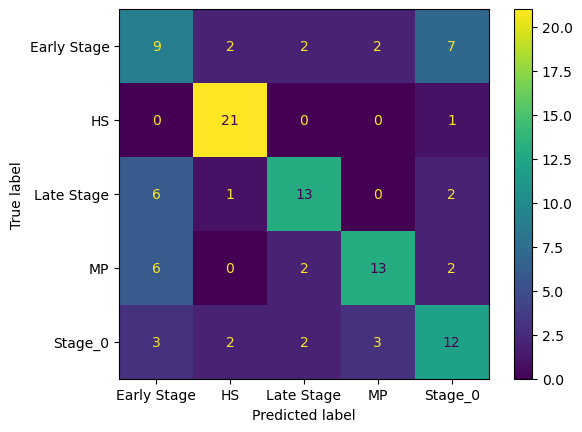

              precision    recall  f1-score   support

 Early Stage       0.38      0.41      0.39        22
          HS       0.81      0.95      0.88        22
  Late Stage       0.68      0.59      0.63        22
          MP       0.72      0.57      0.63        23
     Stage_0       0.50      0.55      0.52        22

    accuracy                           0.61       111
   macro avg       0.62      0.61      0.61       111
weighted avg       0.62      0.61      0.61       111



In [58]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Early Stage', 'HS', 'Late Stage', 'MP', 'Stage_0'])
plt.figure(figsize=(8, 6))
cm_display.plot()
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Early Stage', 'HS', 'Late Stage', 'MP', 'Stage_0'])
print(report)

In [59]:
# Train RF model with best parameters for calculating feature importances
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
y_score = best_rf_model.fit(X_train, y_train).predict_proba(X_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.89
Macro-averaged One-vs-Rest ROC AUC score:
0.88


C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_21836\3495227874.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')


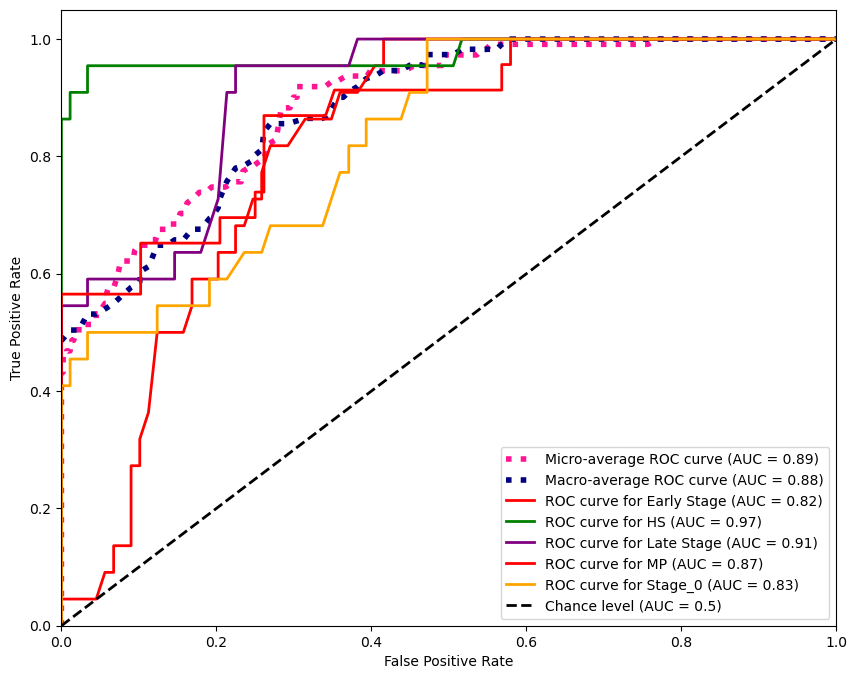

In [60]:
# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.arange(5))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['red', 'green', 'purple', 'red', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for {0} (AUC = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_21836\1304739108.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[top_20_indices], y=top_20_feature_names, palette="viridis")


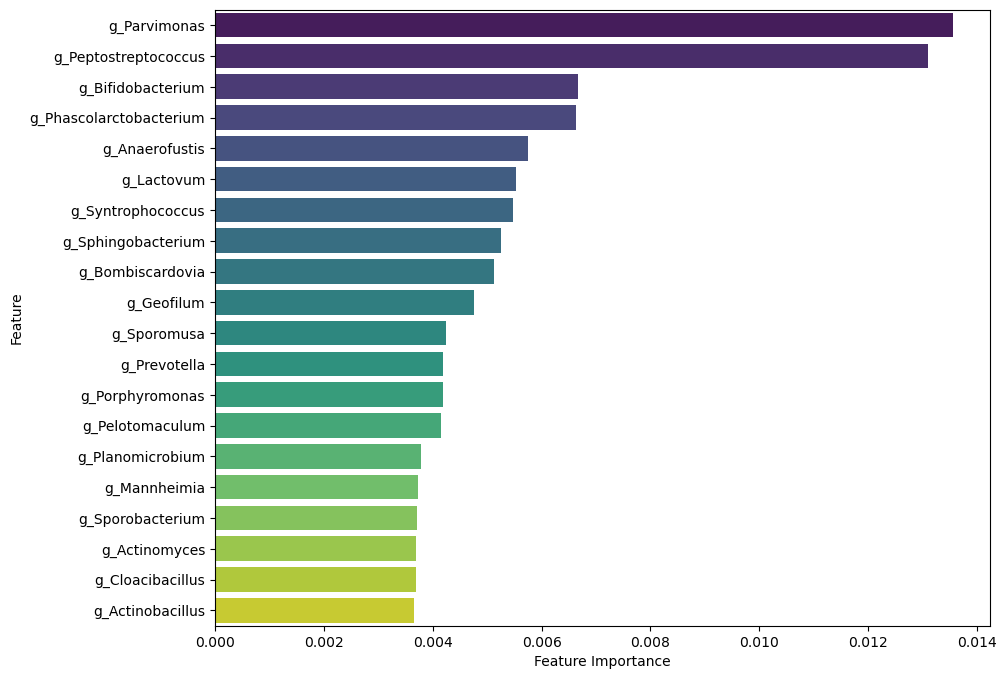

In [61]:
# Extract the best model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

feature_importances = best_rf_model.feature_importances_
top_20_indices = feature_importances.argsort()[::-1][:20]
feature_names = X.columns

# Add the prefix "g_" to the top 20 feature names
top_20_feature_names = ["g_" + feature_names[i] for i in top_20_indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[top_20_indices], y=top_20_feature_names, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [63]:
print(feature_names[top_20_indices])

Index(['Parvimonas', 'Peptostreptococcus', 'Bifidobacterium',
       'Phascolarctobacterium', 'Anaerofustis', 'Lactovum', 'Syntrophococcus',
       'Sphingobacterium', 'Bombiscardovia', 'Geofilum', 'Sporomusa',
       'Prevotella', 'Porphyromonas', 'Pelotomaculum', 'Planomicrobium',
       'Mannheimia', 'Sporobacterium', 'Actinomyces', 'Cloacibacillus',
       'Actinobacillus'],
      dtype='object')


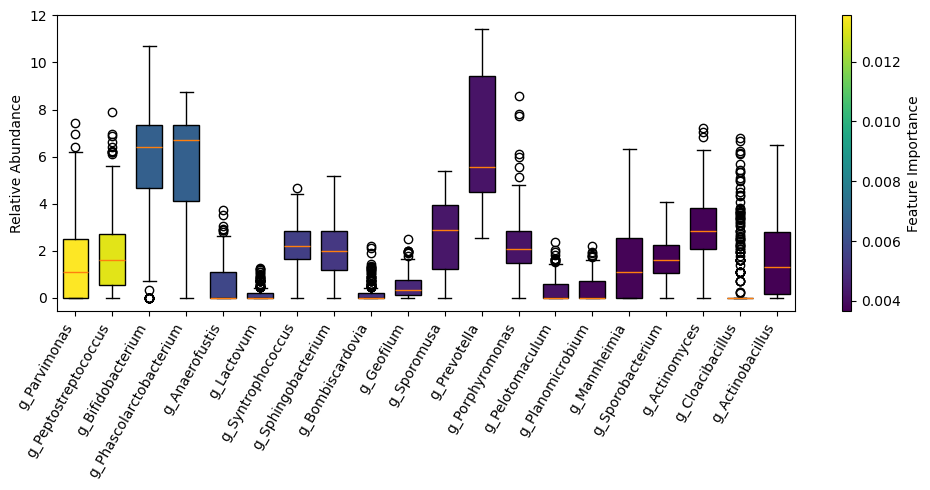

In [62]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Normalize feature importances
norm = Normalize(vmin=min(feature_importances[top_20_indices]), vmax=max(feature_importances[top_20_indices]))
cmap = plt.get_cmap('viridis')  # Choose a colormap
colors = [cmap(norm(importance)) for importance in feature_importances[top_20_indices]]

# Prepare data for boxplot
data = {}
scaled_X = np.log(X + 1)

for original_name, prefixed_name in zip(X.columns[top_20_indices], top_20_feature_names):
    data[prefixed_name] = scaled_X[original_name]

# Plot boxplot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each box with the corresponding color based on feature importance
for i, (key, value) in enumerate(data.items()):
    box = ax.boxplot(value, positions=[i + 1], widths=0.7, patch_artist=True,
                     boxprops=dict(facecolor=colors[i], color='black'),
                     whiskerprops=dict(color='black'))

# Customize plot
ax.set_ylabel('Relative Abundance', fontsize=10)
ax.set_xticks(range(1, len(data) + 1))
ax.set_xticklabels(data.keys(), rotation=60, ha='right', fontsize=10)
plt.tight_layout()

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar, not for plotting
cbar = plt.colorbar(sm, ax=ax, aspect=30)
cbar.set_label('Feature Importance', fontsize=10)

plt.show()

In [10]:
#Evaluate the robustness of ML framework

from sklearn.metrics import precision_score, recall_score, f1_score

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_iterations = 20
robustness_train_scores = []
robustness_test_scores = []
robustness_auroc = []
precision_scores = []
recall_scores = []
f1_scores = []
important_features = []

for i in range(n_iterations):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=i, stratify=y)

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the training data of the resampled set
    train_score = grid_search.best_score_
    robustness_train_scores.append(train_score)

    # Evaluate the model on the test data of the resampled set
    y_pred = grid_search.best_estimator_.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    robustness_test_scores.append(test_score)
    
    # Calculate AUROC score
    y_test_proba = grid_search.best_estimator_.predict_proba(X_test)
    test_auroc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='macro')
    robustness_auroc.append(test_auroc)

# Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Extract the best model's parameters and feature importances
    best_params = grid_search.best_params_
    best_rf_model = RandomForestClassifier(random_state=i, **best_params)
    best_rf_model.fit(X_train, y_train)

    feature_importances = best_rf_model.feature_importances_
    top_20_indices = feature_importances.argsort()[::-1][:20]
    feature_names = X.columns
    top_20_features = feature_names[top_20_indices]
    important_features.extend(top_20_features)

# Calculate statistics for training data
robustness_train_mean = np.mean(robustness_train_scores)
robustness_train_std = np.std(robustness_train_scores)

# Calculate statistics for test data
robustness_test_mean = np.mean(robustness_test_scores)
robustness_test_std = np.std(robustness_test_scores)

# Calculate statistics for AUROC
robustness_auroc_mean = np.mean(robustness_auroc)
robustness_auroc_std = np.std(robustness_auroc)

# Calculate mean and standard deviation for precision, recall, and F1 score
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print("Train Mean Accuracy:", robustness_train_mean)
print("Train Std Accuracy:", robustness_train_std)
print("Test Mean Accuracy:", robustness_test_mean)
print("Test Std Accuracy:", robustness_test_std)
print("Mean AUROC:", robustness_auroc_mean)
print("Std AUROC:", robustness_auroc_std)
print("Mean Precision:", mean_precision)
print("Std Precision:", std_precision)
print("Mean Recall:", mean_recall)
print("Std Recall:", std_recall)
print("Mean F1 Score:", mean_f1)
print("Std F1 Score:", std_f1)


Train Mean Accuracy: 0.6049489274770175
Train Std Accuracy: 0.02038093104073702
Test Mean Accuracy: 0.6346846846846848
Test Std Accuracy: 0.04013561541051959
Mean AUROC: 0.88469187169694
Std AUROC: 0.020104937915104946
Mean Precision: 0.6355737358926007
Std Precision: 0.046519455996045046
Mean Recall: 0.6344861660079052
Std Recall: 0.04010326524912107
Mean F1 Score: 0.6305003479654725
Std F1 Score: 0.04268982822213728


In [11]:
print(f"Train_accuracy_scores: {robustness_train_scores}" )
print(f"Test_accuracy_scores: {robustness_test_scores}" )
print(f"Test_AUROC_scores: {robustness_auroc}" )
print(f"precision_scores: {precision_scores}" )
print(f"recall_scores: {recall_scores}" )
print(f"f1_scores: {f1_scores}" )

Train_accuracy_scores: [0.6374106230847805, 0.623723186925434, 0.5922625127681307, 0.6172114402451481, 0.5901430030643515, 0.6127170582226762, 0.6012002042900919, 0.6012257405515833, 0.5496680286006128, 0.6104698672114403, 0.5901430030643514, 0.6123340143003065, 0.5743360572012257, 0.608120531154239, 0.6035240040858019, 0.5878192032686415, 0.6148876404494382, 0.6126404494382023, 0.6420071501532176, 0.617134831460674]
Test_accuracy_scores: [0.6396396396396397, 0.6306306306306306, 0.6396396396396397, 0.5585585585585585, 0.6126126126126126, 0.6666666666666666, 0.6846846846846847, 0.6216216216216216, 0.7297297297297297, 0.6216216216216216, 0.6036036036036037, 0.6846846846846847, 0.6846846846846847, 0.5945945945945946, 0.6486486486486487, 0.6306306306306306, 0.5855855855855856, 0.6486486486486487, 0.5855855855855856, 0.6216216216216216]
Test_AUROC_scores: [0.9119187724830129, 0.8632910689701114, 0.8795349069591865, 0.8575182084647155, 0.8844833903273083, 0.8910517608917706, 0.91022283163831

In [12]:
# Print or process the list of important features
print("Total number of selected features:", len(important_features))
important_features = pd.DataFrame(important_features)
important_features.to_csv('FI_RF_FMG_Stage.csv', index=False)

Total number of selected features: 400
